## Porto-Seguro-s-Safe-Driver-Prediction-Challenge  

#### Exploratory Data Analysis

Often the precursor of building machine learing models. Its purpose is to get acquainted with the data and get a general view without making any assumptions about it. 

A description of the parameters with keys and descriptions for categorical variables is available here:
https://www.kaggle.com/c/porto-seguro-safe-driver-prediction/data

#### Import useful libraries for EDA

In [1]:
# Load the packages
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [2]:
# Load datasets
train = pd.read_csv('../../data/train.csv')
test = pd.read_csv('../../data/test.csv')



In [4]:
# A look at the dimensions of the datasets 
print("train_set shape: ", train.shape, "test_set shape: ", test.shape)

train_set shape:  (595212, 59) test_set shape:  (892816, 58)


In [7]:
# A glace at the train set
train.head(10)

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0
5,19,0,5,1,4,0,0,0,0,0,...,4,2,0,9,0,1,0,1,1,1
6,20,0,2,1,3,1,0,0,1,0,...,3,0,0,10,0,1,0,0,1,0
7,22,0,5,1,4,0,0,1,0,0,...,7,1,3,6,1,0,1,0,1,0
8,26,0,5,1,3,1,0,0,0,1,...,4,2,1,5,0,1,0,0,0,1
9,28,1,1,1,2,0,0,0,1,0,...,3,5,0,6,0,1,0,0,1,0


In [9]:
#Checking the number of missing values
def check_missing(data):
    vars_w_missing = []
    for c in data.columns:
        count = data[data[c] == -1][c].count()
        if count > 0:
            vars_w_missing.append(c)
            frac_missing = count/data.shape[0]
            print('Column {} has {:.4%} missing values i.e {} records'.format(c, frac_missing, count))
    print('We have {} colums with missing records.'.format(len(vars_w_missing)))

In [21]:
check_missing(train) 

Column ps_ind_02_cat has 0.0363% missing values i.e 216 records
Column ps_ind_04_cat has 0.0139% missing values i.e 83 records
Column ps_ind_05_cat has 0.9760% missing values i.e 5809 records
Column ps_reg_03 has 18.1065% missing values i.e 107772 records
Column ps_car_01_cat has 0.0180% missing values i.e 107 records
Column ps_car_02_cat has 0.0008% missing values i.e 5 records
Column ps_car_03_cat has 69.0898% missing values i.e 411231 records
Column ps_car_05_cat has 44.7825% missing values i.e 266551 records
Column ps_car_07_cat has 1.9302% missing values i.e 11489 records
Column ps_car_09_cat has 0.0956% missing values i.e 569 records
Column ps_car_11 has 0.0008% missing values i.e 5 records
Column ps_car_12 has 0.0002% missing values i.e 1 records
Column ps_car_14 has 7.1605% missing values i.e 42620 records
We have 13 colums with missing records.


In [22]:
check_missing(test)

Column ps_ind_02_cat has 0.0344% missing values i.e 307 records
Column ps_ind_04_cat has 0.0162% missing values i.e 145 records
Column ps_ind_05_cat has 0.9756% missing values i.e 8710 records
Column ps_reg_03 has 18.1094% missing values i.e 161684 records
Column ps_car_01_cat has 0.0179% missing values i.e 160 records
Column ps_car_02_cat has 0.0006% missing values i.e 5 records
Column ps_car_03_cat has 69.0972% missing values i.e 616911 records
Column ps_car_05_cat has 44.8423% missing values i.e 400359 records
Column ps_car_07_cat has 1.9412% missing values i.e 17331 records
Column ps_car_09_cat has 0.0982% missing values i.e 877 records
Column ps_car_11 has 0.0001% missing values i.e 1 records
Column ps_car_14 has 7.1465% missing values i.e 63805 records
We have 12 colums with missing records.


In [23]:
# Create dataframe to store meta-info
data = []
for f in train.columns:
    if f == 'target':
        role = 'target'
    elif f == 'id':
        role = 'id'
    else:
        role = 'input'

    if 'bin' in f or f == 'target':
        level = 'binary'
    elif 'cat' in f or f == 'id':
        level = 'nominal'
    elif train[f].dtype == float:
        level = 'interval'
    elif train[f].dtype == int:
        level = 'ordinal'
        
    #Now initialize keep to true for all variables except id
    keep = True
    if f == 'id':
        keep = False
     
    dtype = train[f].dtype  #Defining the data type 
    
    f_dict = {
        'varname': f,
        'role': role,
        'level': level,
        'keep': keep,
        'dtype': dtype
    }
    data.append(f_dict)
    
metadata = pd.DataFrame(data, columns=['varname', 'role', 'level', 'keep', 'dtype'])
metadata.set_index('varname', inplace=True)

In [24]:
metadata.head()

,role,level,keep,dtype
varname,,,,
id,id,nominal,False,int64
target,target,binary,True,int64
ps_ind_01,input,ordinal,True,int64
ps_ind_02_cat,input,nominal,True,int64
ps_ind_03,input,ordinal,True,int64


In [25]:
#Count the number of variables per metadata-role 
pd.DataFrame({'count' : metadata.groupby(['role', 'level'])['role'].size()})

count
role   level          
id     nominal       1
input  binary       17
       interval     10
       nominal      14
       ordinal      16
target binary        1

In [40]:
# A summary of the interval variables
int_vars = metadata[(metadata.level == 'interval') & (metadata.keep)].index
train[int_vars].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ps_reg_01,595212.0,0.610991,0.287643,0.000000,0.400000,0.700000,0.900000,0.900000
ps_reg_02,595212.0,0.439184,0.404264,0.000000,0.200000,0.300000,0.600000,1.800000
ps_reg_03,595212.0,0.551102,0.793506,-1.000000,0.525000,0.720677,1.000000,4.037945
ps_car_12,595212.0,0.379945,0.058327,-1.000000,0.316228,0.374166,0.400000,1.264911
ps_car_13,595212.0,0.813265,0.224588,0.250619,0.670867,0.765811,0.906190,3.720626
ps_car_14,595212.0,0.276256,0.357154,-1.000000,0.333167,0.368782,0.396485,0.636396
ps_car_15,595212.0,3.065899,0.731366,0.000000,2.828427,3.316625,3.605551,3.741657
ps_calc_01,595212.0,0.449756,0.287198,0.000000,0.200000,0.500000,0.700000,0.900000
ps_calc_02,595212.0,0.449589,0.286893,0.000000,0.200000,0.400000,0.700000,0.900000
ps_calc_03,595212.0,0.449849,0.287153,0.000000,0.200000,0.500000,0.700000,0.900000


In [41]:
# A summary of binary variables 
bin_vars = metadata[(metadata.level == 'binary') & metadata.keep].index
train[bin_vars].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
target,595212.0,0.036448,0.187401,0.0,0.0,0.0,0.0,1.0
ps_ind_06_bin,595212.0,0.393742,0.488579,0.0,0.0,0.0,1.0,1.0
ps_ind_07_bin,595212.0,0.257033,0.436998,0.0,0.0,0.0,1.0,1.0
ps_ind_08_bin,595212.0,0.163921,0.370205,0.0,0.0,0.0,0.0,1.0
ps_ind_09_bin,595212.0,0.185304,0.388544,0.0,0.0,0.0,0.0,1.0
ps_ind_10_bin,595212.0,0.000373,0.019309,0.0,0.0,0.0,0.0,1.0
ps_ind_11_bin,595212.0,0.001692,0.041097,0.0,0.0,0.0,0.0,1.0
ps_ind_12_bin,595212.0,0.009439,0.096693,0.0,0.0,0.0,0.0,1.0
ps_ind_13_bin,595212.0,0.000948,0.030768,0.0,0.0,0.0,0.0,1.0
ps_ind_16_bin,595212.0,0.660823,0.473430,0.0,0.0,1.0,1.0,1.0


In [44]:
# A summary of categorical variables 
cat_vars = metadata[(metadata.level == 'nominal') & (metadata.keep)].index
train[cat_vars].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ps_ind_02_cat,595212.0,1.358943,0.664594,-1.0,1.0,1.0,2.0,4.0
ps_ind_04_cat,595212.0,0.416794,0.493311,-1.0,0.0,0.0,1.0,1.0
ps_ind_05_cat,595212.0,0.405188,1.350642,-1.0,0.0,0.0,0.0,6.0
ps_car_01_cat,595212.0,8.295933,2.508270,-1.0,7.0,7.0,11.0,11.0
ps_car_02_cat,595212.0,0.829931,0.375716,-1.0,1.0,1.0,1.0,1.0
ps_car_03_cat,595212.0,-0.504899,0.788654,-1.0,-1.0,-1.0,0.0,1.0
ps_car_04_cat,595212.0,0.725192,2.153463,0.0,0.0,0.0,0.0,9.0
ps_car_05_cat,595212.0,-0.157732,0.844417,-1.0,-1.0,0.0,1.0,1.0
ps_car_06_cat,595212.0,6.555340,5.501445,0.0,1.0,7.0,11.0,17.0
ps_car_07_cat,595212.0,0.910027,0.347106,-1.0,1.0,1.0,1.0,1.0


In [47]:
# Checking cardinality 
cat_vars = metadata[(metadata.level == 'nominal') & (metadata.keep)].index
for col in cat_level:
    dist_vals = train[col].value_counts().shape[0]
    print('Column {} has {} distinct values'.format(col, dist_vals))

Column ps_ind_02_cat has 5 distinct values
Column ps_ind_04_cat has 3 distinct values
Column ps_ind_05_cat has 8 distinct values
Column ps_car_01_cat has 13 distinct values
Column ps_car_02_cat has 3 distinct values
Column ps_car_03_cat has 3 distinct values
Column ps_car_04_cat has 10 distinct values
Column ps_car_05_cat has 3 distinct values
Column ps_car_06_cat has 18 distinct values
Column ps_car_07_cat has 3 distinct values
Column ps_car_08_cat has 2 distinct values
Column ps_car_09_cat has 6 distinct values
Column ps_car_10_cat has 3 distinct values
Column ps_car_11_cat has 104 distinct values


Now we explore the data with visual graphics 

In [63]:
cat_fraction = train[[col, 'target']].groupby([col],as_index=False).mean()
cat_fraction.sort_values(by='target', ascending=False, inplace=True)

In [76]:
??plt.bar()

<Figure size 432x288 with 0 Axes>

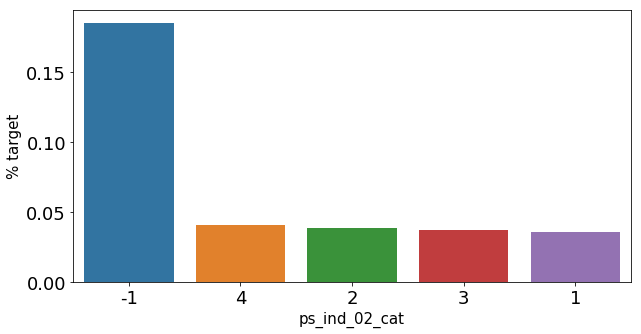

<Figure size 432x288 with 0 Axes>

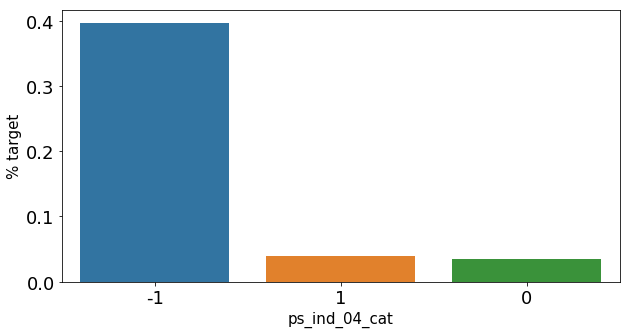

<Figure size 432x288 with 0 Axes>

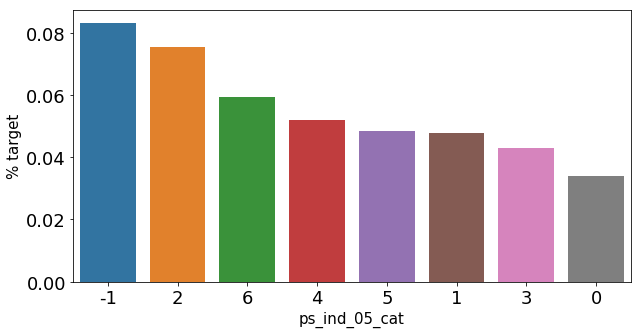

<Figure size 432x288 with 0 Axes>

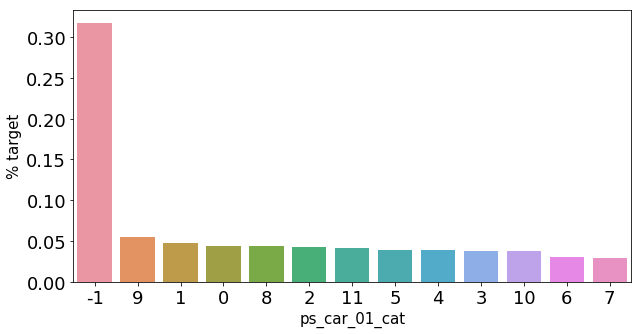

<Figure size 432x288 with 0 Axes>

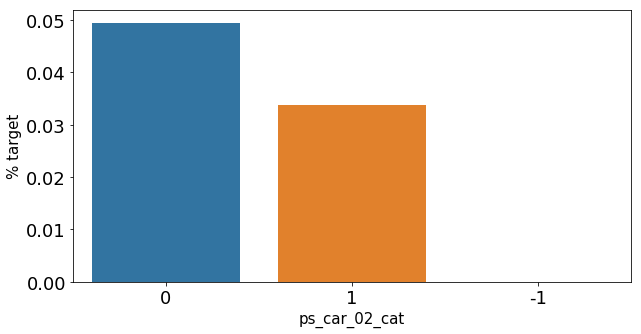

<Figure size 432x288 with 0 Axes>

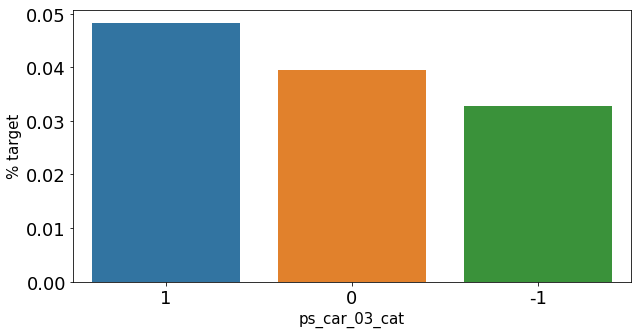

<Figure size 432x288 with 0 Axes>

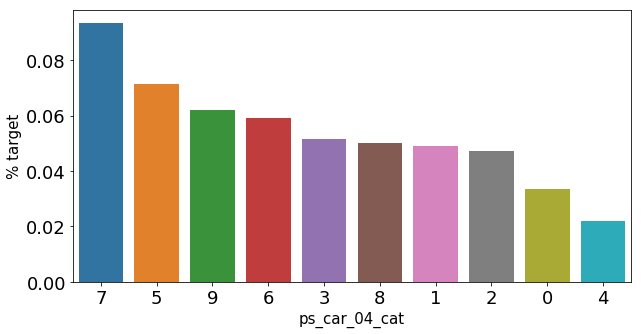

<Figure size 432x288 with 0 Axes>

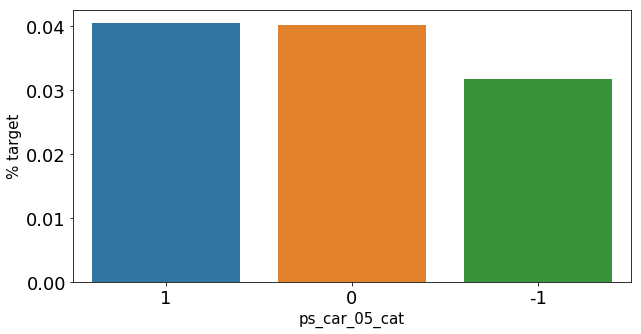

<Figure size 432x288 with 0 Axes>

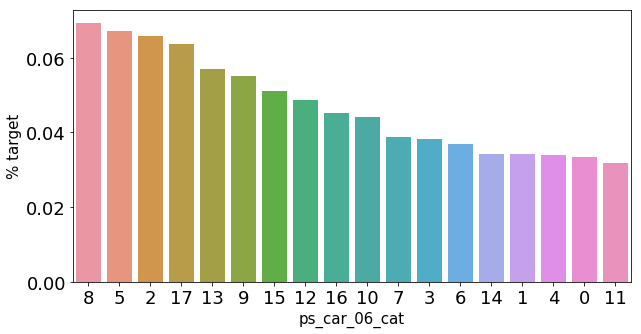

<Figure size 432x288 with 0 Axes>

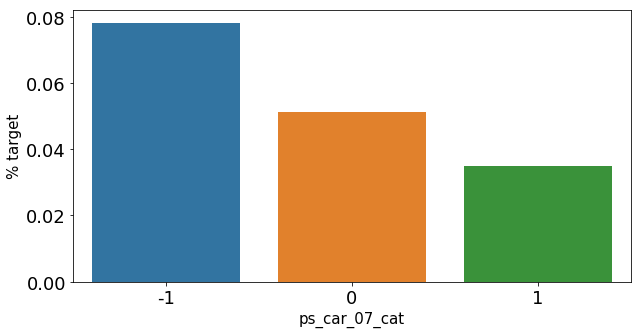

<Figure size 432x288 with 0 Axes>

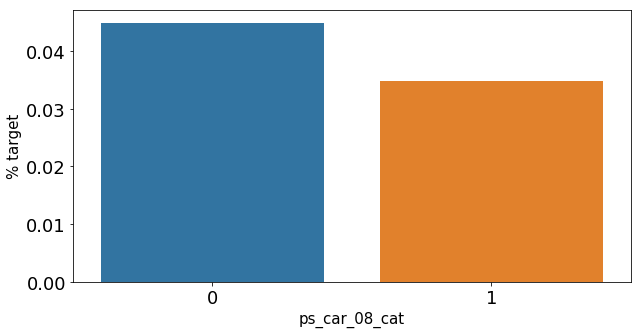

<Figure size 432x288 with 0 Axes>

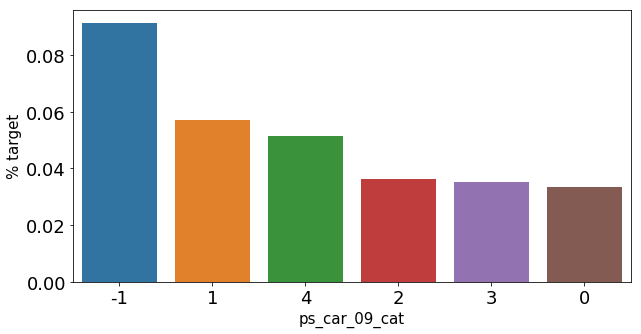

<Figure size 432x288 with 0 Axes>

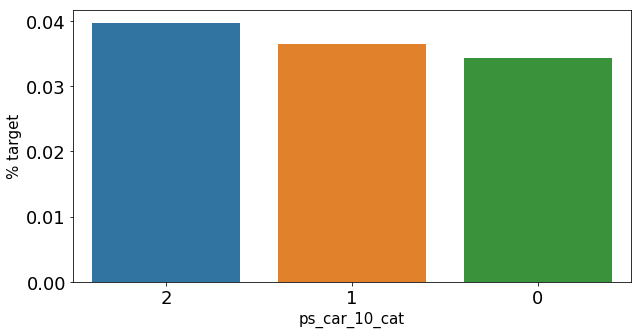

<Figure size 432x288 with 0 Axes>

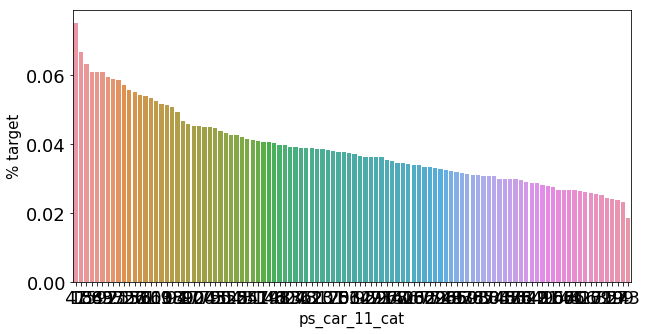

In [81]:
# Now for each categorical variable we looking at the proportion of customers with target = 1.
for col in cat_vars:
    plt.figure()
    fig, ax = plt.subplots(figsize=(10, 5))
    cat_fraction = train[[col, 'target']].groupby([col],as_index=False).mean()
    cat_fraction.sort_values(by='target', ascending=False, inplace=True)
    sns.barplot(ax=ax, x=col, y = 'target', data=cat_fraction, order=cat_fraction[col])
    plt.ylabel('% target', fontsize=15)
    plt.xlabel(col, fontsize=15)
    plt.tick_params(axis='both', which='major', labelsize=18)
    plt.show();


In [102]:
#Define function for checking correlations  
def corr_heatmap(col):
    corrs = train[col].corr()
    cmap = sns.diverging_palette(220, 10, as_cmap=False)
    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(corrs, cmap=cmap, vmax=1.0, center=0, fmt='.2f', square=True,linewidth=.5, annot=True,cbar_kws={'shrink': 0.75})
    plt.show();

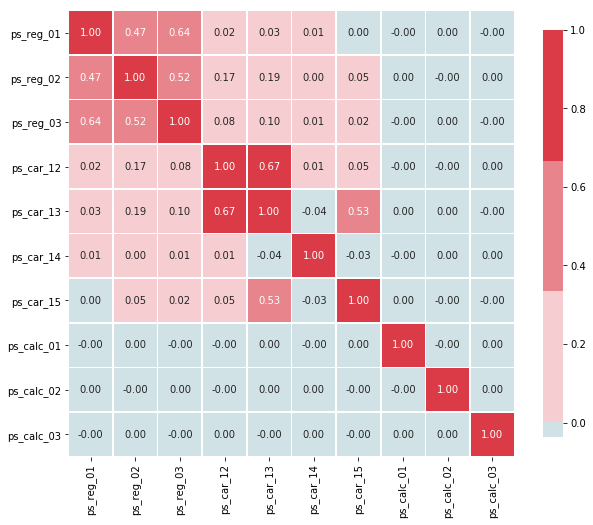

In [103]:
#Checking for correlations between the interval variables
int_vars = metadata[(metadata.level == 'interval') & (metadata.keep)].index
corr_heatmap(int_vars)

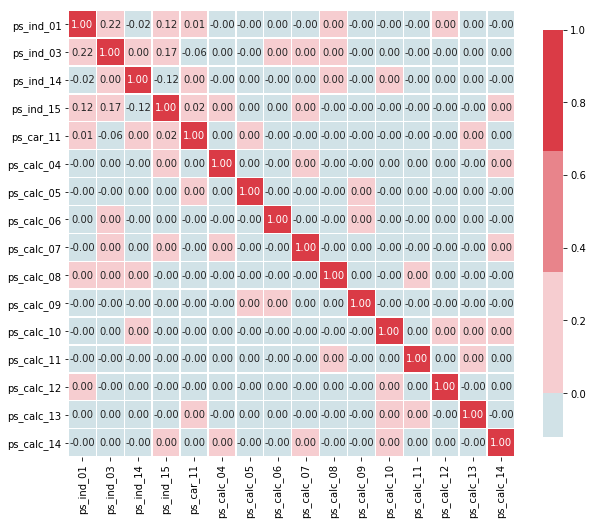

In [104]:
#Checking for correlations between the ordinal variables
ord_vars = metadata[(metadata.level == 'ordinal') & (metadata.keep)].index
corr_heatmap(ord_vars)

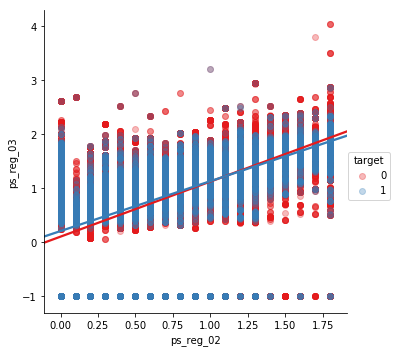

In [105]:
#Visualizing the linear relationship between the highly correlated variables
sns.lmplot(x='ps_reg_02', y='ps_reg_03', data=train, hue='target', palette='Set1', scatter_kws={'alpha': 0.3})
plt.show()

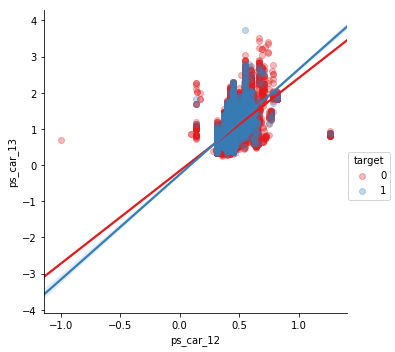

In [106]:
sns.lmplot(x='ps_car_12', y='ps_car_13', data=train, hue='target', palette='Set1', scatter_kws={'alpha':0.3})
plt.show()

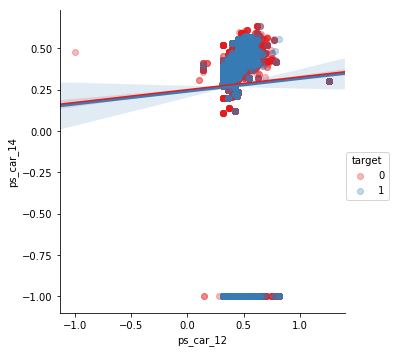

In [107]:
sns.lmplot(x='ps_car_12', y='ps_car_14', data=train, hue='target', palette='Set1', scatter_kws={'alpha':0.3})
plt.show()

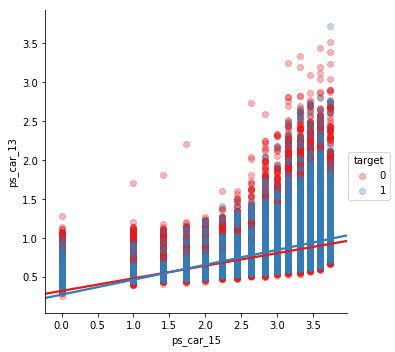

In [108]:
sns.lmplot(x='ps_car_15', y='ps_car_13', data=train, hue='target', palette='Set1', scatter_kws={'alpha':0.3})
plt.show()

#### Import libraries for feature engineering and model training 

In [5]:
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
import datetime
import lightgbm as lgb
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import StratifiedKFold
from scipy import sparse as ssp

#### Define evaluation metric.
With a high disparity between the number of positive and negative labels in the target variable the Gini-coefficient as the evaluation metric instead of accuracy. The gini-coefficient normalizes the area under the receiver operating characteristic curve (AUROC)  such that the range of possible scores is [-1, 1]. 

An intuitive explanation can be found at: https://www.kaggle.com/batzner/gini-coefficient-an-intuitive-explanation

In [6]:
# Evaluation metric
def eval_gini(y_true, y_prob):
    y_true = np.asarray(y_true)
    y_true = y_true[np.argsort(y_prob)]
    ntrue = 0
    gini = 0
    delta = 0
    n = len(y_true)
    for i in range(n-1, -1, -1):
        y_i = y_true[i]
        ntrue += y_i
        gini += y_i * delta
        delta += 1 - y_i
    gini = 1 - 2 * gini / (ntrue * (n - ntrue))
    return gini

#Evaluation error function
def eval_error(preds, dtrain):
    labels = dtrain.get_label()
    gini_score = eval_gini(labels, preds)
    return [('gini', gini_score, True)]

#### Create pre-processing and feature engineering function
The function also allows for any feature engineering (new fields) we want to add

In [3]:
def data_preprocessing(train, test):
    ''' Features engineered for the model: 
          all calculated features are removed.
     
          all categorical features are one-hot-encoded
          
          adds a feature with a count of categorical features.
          
          adds a feature with total number of missing values per row.
    Parameters:
    -----------
    train: training dataset 
    test: test dataset 

    '''
    Y_train = train['target']
    train_id = train['id']
    test_id = test['id']
    X = train.drop(['id','target'],axis=1)
    col_names = X.columns.tolist()
    cat_cols = []
    ind_cols = []
    num_cols = []
    for col in col_names:
        if 'cat' not in col and 'calc' not in col:
            num_cols.append(col)

    for col in col_names: 
        if 'cat' in col and 'count' not in col: 
            cat_cols.append(col)

    for col in col_names:
        if 'ind' in col:
            ind_cols.append(col)

    train['missing'] = (train==-1).sum(axis=1).astype(float)
    test['missing'] = (test==-1).sum(axis=1).astype(float)
    num_cols.append('missing')

    for col in cat_cols:
        le = LabelEncoder()
        le.fit(train[col])
        train[col], test[col] = le.transform(train[col]), le.transform(test[col])
    

    enc = OneHotEncoder()
    enc.fit(train[cat_cols])
    X_train_cat, X_test_cat = enc.transform(train[cat_cols]), enc.transform(test[cat_cols])
    
    count=0
    for col in ind_cols:
        if count==0:
            train['new_ind'] = train[col].astype(str)+'_'
            test['new_ind'] = test[col].astype(str)+'_'
            count+=1
    else:
        train['new_ind'] += train[col].astype(str)+'_'
        test['new_ind'] += test[col].astype(str)+'_'

    cat_count_cols = []
    for col in cat_cols+['new_ind']:
        d = pd.concat([train[col],test[col]]).value_counts().to_dict()
        train['%s_count'%col] = train[col].apply(lambda x:d.get(x,0))
        test['%s_count'%col] = test[col].apply(lambda x:d.get(x,0))
        cat_count_cols.append('%s_count'%col)

    train_list = [train[num_cols+cat_count_cols].values,X_train_cat,]
    test_list = [test[num_cols+cat_count_cols].values,X_test_cat,]

    X = ssp.hstack(train_list).tocsr()
    X_test = ssp.hstack(test_list).tocsr()

    return X,X_test, Y_train,train_id,test_id,train,test

In [7]:
X,X_test, Y_train,train_id,test_id,train,test = data_preprocessing(train, test)

In [8]:
# Functions to run the train and validate the model 
def model_lgb(x_matrix,X_test,cv_folds=5,early_stopping_rounds=100):
    '''Trains, validates the model and makes predictions on the test set
        
    Parameters:
    -----------
    x_matrix: matrix of parameters.

    X_test: test set.

    cv_folds: number of folds.
    
    early_stopping_rounds: Training until validation scores don't improve for assigned number rounds
    
    '''
    learning_rate = 0.1
    num_leaves = 15
    min_data_in_leaf = 2000
    verbose_eval=100
    num_boost_round = 10000
    feature_fraction = 0.6
    useTrainCV = True
    k_fold = StratifiedKFold(n_splits=cv_folds, shuffle=True, random_state=218)
    k_folds = k_fold.split(x_matrix, Y_train)
    x_score = []
    final_cv_train = np.zeros(len(Y_train))
    final_cv_pred = np.zeros(len(test_id))
    for i in range(16):
        cv_train = np.zeros(len(Y_train))
        cv_pred = np.zeros(len(test_id))
        params = {"objective": "binary","boosting_type": "gbdt","learning_rate": learning_rate,"num_leaves": num_leaves,"max_bin": 256,"feature_fraction": feature_fraction,"verbosity": 0,
                          "drop_rate": 0.1,"is_unbalance": False,"max_drop": 50,"min_child_samples": 10,"min_child_weight": 150,"min_split_gain": 0,"subsample": 0.9}
        params['seed'] = i
        if useTrainCV == True:
            best_trees = []
            fold_scores = []
            for i, (train_fold, val) in enumerate(k_folds):
                x_train, x_val, y_train, y_val = x_matrix[train_fold, :], x_matrix[val, :], Y_train[train_fold], Y_train[val]
                dtrain = lgb.Dataset(x_train, y_train)
                dvalid = lgb.Dataset(x_val, y_val, reference=dtrain)
                start_time = datetime.datetime.now()
                bst = lgb.train(params, dtrain, num_boost_round, valid_sets=dvalid, feval=eval_error, verbose_eval=verbose_eval,early_stopping_rounds=early_stopping_rounds)
                best_trees.append(bst.best_iteration)
                cv_pred += bst.predict(X_test, num_iteration=bst.best_iteration)
                cv_train[val] += bst.predict(x_val)
                score = eval_gini(y_val, cv_train[val])
                print(score)
                fold_scores.append(score)
            cv_pred /= cv_folds
            final_cv_train += cv_train
            final_cv_pred += cv_pred

            print("cv score:")
            print(eval_gini(Y_train, cv_train))
            print("current score:", eval_gini(Y_train, final_cv_train / (i + 1.)), i+1)
            print(fold_scores)
            print(best_trees, np.mean(best_trees))

            x_score.append(eval_gini(Y_train, cv_train))
            end_time = datetime.datetime.now()
            print('Training Done..., Time Cost: %d' % ((end_time - start_time).seconds))
            
    print(x_score)
    pd.DataFrame({'id': test_id, 'target': final_cv_pred / 16.}).to_csv('lgbm.csv', index=False)        
    
    

In [9]:
#Run model & prepare for submission
model_lgb(X,X_test,cv_folds=5,early_stopping_rounds=100)

Training until validation scores don't improve for 100 rounds.
[100]	valid_0's gini: 0.291136
[200]	valid_0's gini: 0.296275
[300]	valid_0's gini: 0.29782
[400]	valid_0's gini: 0.296061
Early stopping, best iteration is:
[303]	valid_0's gini: 0.298036
0.2980358257755642
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's gini: 0.269573
[200]	valid_0's gini: 0.271931
[300]	valid_0's gini: 0.272737
Early stopping, best iteration is:
[282]	valid_0's gini: 0.273554
0.2735536076930548
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's gini: 0.279445
[200]	valid_0's gini: 0.284075
[300]	valid_0's gini: 0.285349
Early stopping, best iteration is:
[265]	valid_0's gini: 0.285546
0.2855461134855326
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's gini: 0.281052
[200]	valid_0's gini: 0.286028
[300]	valid_0's gini: 0.285938
[400]	valid_0's gini: 0.283745
Early stopping, best iteration is:
[319]	valid_0's gini: 0.2